In [572]:
# !wget http://www.kasprowski.pl/datasets/weather.zip
# !pip install tensorflow==2.12

In [573]:
#!unzip weather.zip

In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import glob
import cv2
from sklearn.preprocessing import LabelBinarizer
import random
import sklearn.model_selection
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

In [575]:
# ---------------------------------------
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# I don't want to put the whole code into a single function and invoke it twice
# If you want to classify for 2 classes,
# set NoC2 to True
# If you want to classify for 4 classes,
# set NoC2 to False

NoC2 = True
#NoC2 = False

def load_img(indir,NoC2):
    samples = []
    labels = []
    TwoClasses = ['cloudy','sunrise']
    #FourClasses = ['shine','sunrise','rain','cloudy']
    liczba_klas = 0
    for class_dir in os.listdir(indir):

        if NoC2 and class_dir not in TwoClasses:
            continue

        if not os.path.isdir(os.path.join(indir, class_dir)):
            continue

        liczba_klas += 1
        if not os.path.isdir(indir+'/'+class_dir):
          continue
        print("Loading:",class_dir)
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (64,64))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels,liczba_klas


samples, labels,liczba_klas = load_img('weather',NoC2)
print('loaded',len(samples),' samples')
print('classes',set(labels))
org_samples = samples

Dlabels = labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

org_labels = labels

Loading: sunrise
Loading: cloudy
loaded 657  samples
classes {'sunrise', 'cloudy'}


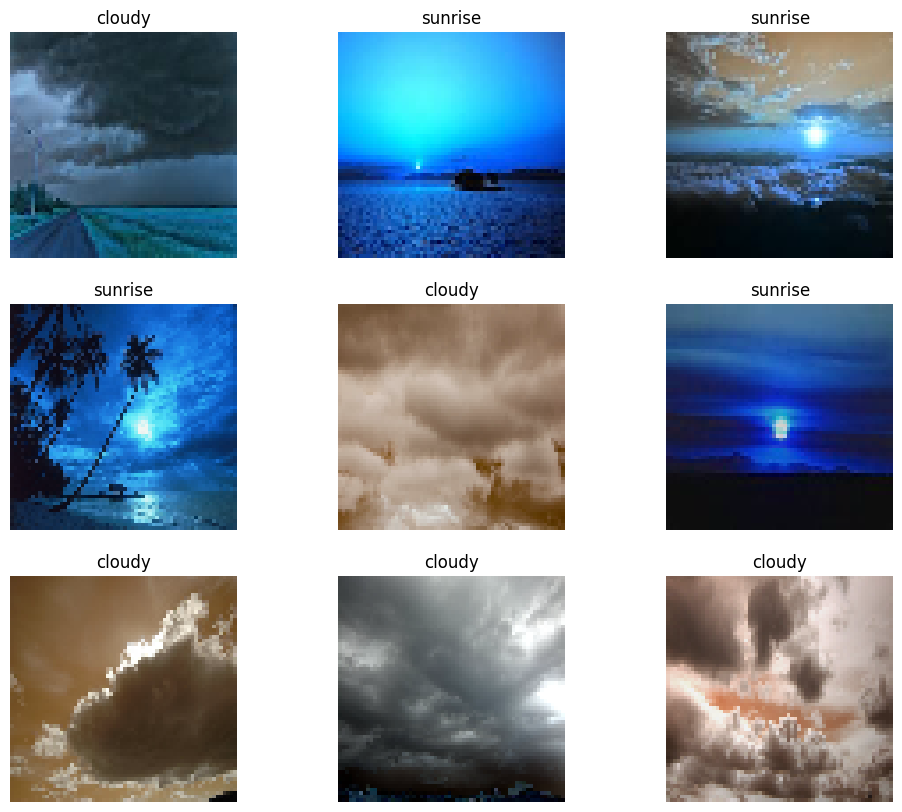

In [576]:
plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(samples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[n])
    plt.title(Dlabels[n])
    plt.axis("off")

In [577]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(liczba_klas))
model.add(Activation("softmax"))
model.summary()


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_92 (Bat  (None, 64, 64, 16)       64        
 chNormalization)                                                
                                                                 
 activation_184 (Activation)  (None, 64, 64, 16)       0         
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_93 (Bat  (None, 32, 32, 32)     

In [578]:
samples = org_samples.copy()
labels = org_labels.copy()

print("Samples shape before",samples.shape)

# flatten samples
samples = np.reshape(samples,newshape=(samples.shape[0],-1))
print("Samples shape flattened",samples.shape)

Samples shape before (657, 64, 64, 3)
Samples shape flattened (657, 12288)


In [579]:
# one-hot labels

labels = to_categorical(labels, num_classes=liczba_klas)
print("Labels shape",labels.shape)
labels = labels.astype(float)

Labels shape (657, 2)


In [580]:
samples = org_samples
print(samples.shape)

(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,test_size=0.25,random_state=22)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])


(657, 64, 64, 3)


In [581]:

H = model.fit(trainSamples, trainLabels, epochs=10, validation_data=(testSamples,testLabels))

Epoch 1/10
16/16 [==============================] - 4s 223ms/step - loss: 3.4787 - accuracy: 0.7805 - val_loss: 0.8484 - val_accuracy: 0.8303
Epoch 2/10
16/16 [==============================] - 3s 165ms/step - loss: 0.1753 - accuracy: 0.9472 - val_loss: 0.3088 - val_accuracy: 0.9212
Epoch 3/10
16/16 [==============================] - 2s 131ms/step - loss: 0.1041 - accuracy: 0.9675 - val_loss: 0.3883 - val_accuracy: 0.8848
Epoch 4/10
16/16 [==============================] - 2s 126ms/step - loss: 0.0377 - accuracy: 0.9858 - val_loss: 0.4471 - val_accuracy: 0.8606
Epoch 5/10
16/16 [==============================] - 2s 127ms/step - loss: 0.0310 - accuracy: 0.9919 - val_loss: 0.1453 - val_accuracy: 0.9333
Epoch 6/10
16/16 [==============================] - 2s 128ms/step - loss: 0.0177 - accuracy: 0.9980 - val_loss: 0.2434 - val_accuracy: 0.9030
Epoch 7/10
16/16 [==============================] - 3s 185ms/step - loss: 0.0348 - accuracy: 0.9878 - val_loss: 0.1017 - val_accuracy: 0.9515
Epoch 

In [582]:
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1)))


6/6 [==============================] - 0s 25ms/step
[[66  6]
 [ 0 93]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        72
           1       0.94      1.00      0.97        93

    accuracy                           0.96       165
   macro avg       0.97      0.96      0.96       165
weighted avg       0.97      0.96      0.96       165

Cohen's Kappa: 0.9253731343283582
Accuracy:  0.9636363636363636


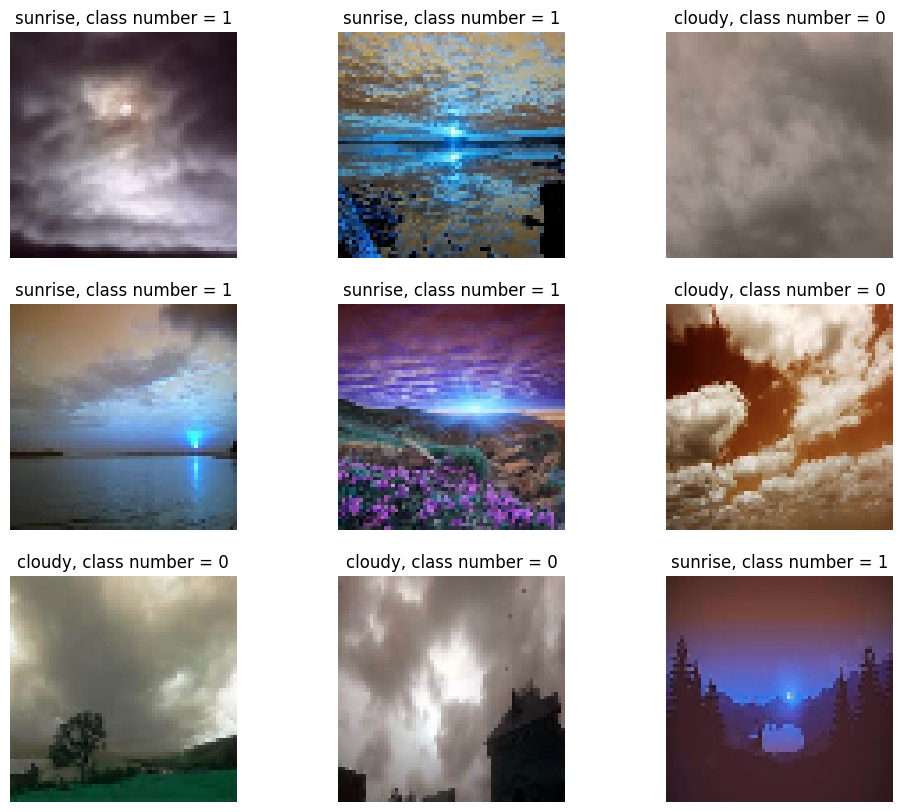

In [583]:
if(not NoC2):
  Classes = ['cloudy','rain','shine','sunrise']
else:
  Classes = ['cloudy','sunrise']

plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(testSamples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(testSamples[n])
    plt.title(Classes[testResults.argmax(axis=1)[n]] + ', class number = ' + str(testResults.argmax(axis=1)[n]))
    plt.axis("off")

In [584]:
#
#
#------------------------------------------------
if(NoC2):
  model2 = Sequential()
  model2.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
  model2.add(BatchNormalization())
  model2.add(Activation("relu"))
  model2.add(MaxPooling2D(pool_size=(2, 2)))
  model2.add(Conv2D(32, (3, 3), padding="same"))
  model2.add(BatchNormalization())
  model2.add(Activation("relu"))
  model2.add(MaxPooling2D(pool_size=(2, 2)))
  model2.add(Dropout(0.25))

  model2.add(Flatten())
  model2.add(Dense(512))
  model2.add(Activation("relu"))
  model2.add(Dense(1))
  model2.add(Activation("sigmoid"))
  model2.summary()


Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_94 (Bat  (None, 64, 64, 16)       64        
 chNormalization)                                                
                                                                 
 activation_188 (Activation)  (None, 64, 64, 16)       0         
                                                                 
 max_pooling2d_94 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_95 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_95 (Bat  (None, 32, 32, 32)     

In [585]:
if(NoC2):
  samples = org_samples.copy()
  labels = org_labels.copy()

  print("Samples shape before",samples.shape)

  # flatten samples
  samples = np.reshape(samples,newshape=(samples.shape[0],-1))
  print("Samples shape flattened",samples.shape)

Samples shape before (657, 64, 64, 3)
Samples shape flattened (657, 12288)


In [586]:
# one-hot labels
if(NoC2):
  lb = LabelBinarizer()
  labels = lb.fit_transform(labels)
  print("Labels shape",labels.shape)
  labels = labels.astype(float)

Labels shape (657, 1)


In [587]:
if(NoC2):
  samples = org_samples
  print(samples.shape)

  (trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,test_size=0.25,random_state=22)
  model2.compile(loss='binary_crossentropy', optimizer="adam",metrics=['accuracy'])

(657, 64, 64, 3)


In [588]:
if(NoC2):
  H = model2.fit(trainSamples, trainLabels, epochs=10, validation_data=(testSamples,testLabels))

Epoch 1/10
16/16 [==============================] - 3s 137ms/step - loss: 1.6236 - accuracy: 0.8476 - val_loss: 37.5769 - val_accuracy: 0.5636
Epoch 2/10
16/16 [==============================] - 3s 175ms/step - loss: 0.4074 - accuracy: 0.9309 - val_loss: 0.9176 - val_accuracy: 0.9152
Epoch 3/10
16/16 [==============================] - 3s 198ms/step - loss: 0.0985 - accuracy: 0.9654 - val_loss: 1.3103 - val_accuracy: 0.8788
Epoch 4/10
16/16 [==============================] - 2s 124ms/step - loss: 0.0573 - accuracy: 0.9776 - val_loss: 1.0971 - val_accuracy: 0.8727
Epoch 5/10
16/16 [==============================] - 2s 124ms/step - loss: 0.0539 - accuracy: 0.9858 - val_loss: 0.5944 - val_accuracy: 0.9152
Epoch 6/10
16/16 [==============================] - 2s 126ms/step - loss: 0.0763 - accuracy: 0.9756 - val_loss: 0.0571 - val_accuracy: 0.9879
Epoch 7/10
16/16 [==============================] - 2s 126ms/step - loss: 0.0183 - accuracy: 0.9959 - val_loss: 0.0722 - val_accuracy: 0.9697
Epoch

In [589]:
if(NoC2):
  testResults = model2.predict(testSamples)
  testResults = np.round(testResults)

  print(confusion_matrix(testLabels, testResults))
  print(classification_report(testLabels, testResults))
  print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels, testResults)))
  print("Accuracy: ",accuracy_score(testLabels, testResults))



6/6 [==============================] - 0s 25ms/step
[[69  3]
 [ 0 93]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        72
         1.0       0.97      1.00      0.98        93

    accuracy                           0.98       165
   macro avg       0.98      0.98      0.98       165
weighted avg       0.98      0.98      0.98       165

Cohen's Kappa: 0.962862930452397
Accuracy:  0.9818181818181818


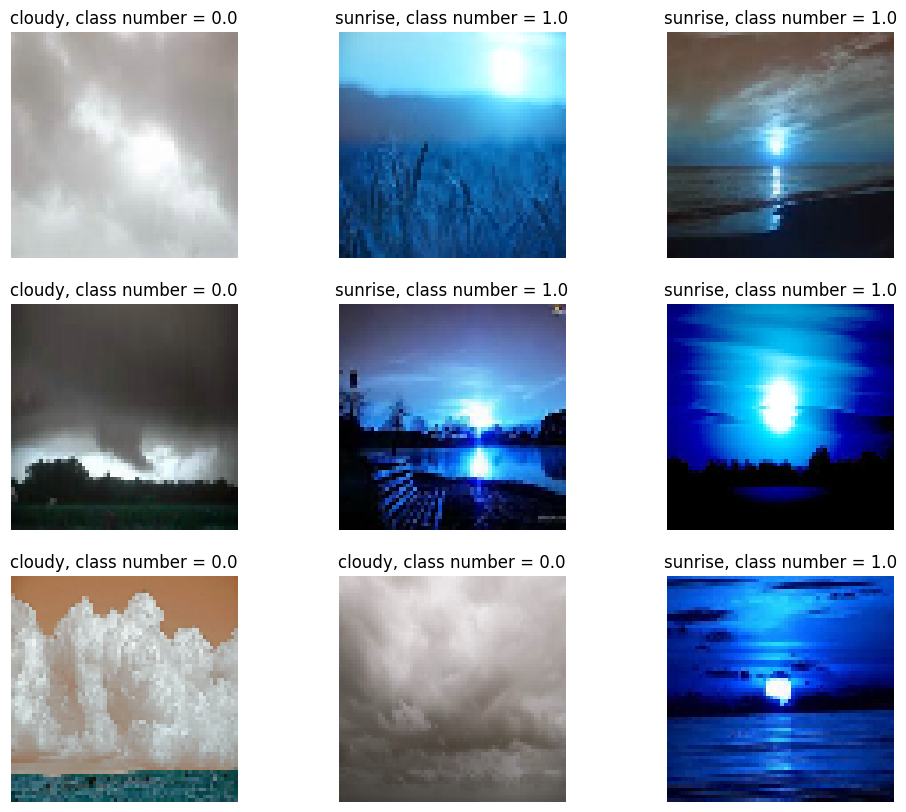

In [590]:
if(NoC2):

  Classes = ['cloudy','sunrise']

  plt.figure(figsize=(12, 10))
  for i in range(9):
      n = random.randrange(len(testSamples))
      plt.subplot(3, 3, i + 1)
      plt.imshow(testSamples[n])
      plt.title(Classes[int(testResults[n,0])] + ', class number = ' + str(testResults[n,0]))
      plt.axis("off")